Logbook for the DA01 Introduction to Data Analysis prelime practicals.


First I have imported all the required modules;

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

Now I define all the Mathematical functions I need for the whole project

In [2]:
def exp(x, a, b, c):
    return a * np.exp(-b * x) + c

def lin(x, a, b):
    return a * x + b

def poly(x, a, b, c):
    return a * (x **2) + b * x + c

Code for EX 4_1 / Exercise 1: Calculating Hubbles Constant

In [3]:
def ex_4_1(df):
    plt.figure(4)
    x = df[df.columns[0]].values
    x_err = df[df.columns[1]].values
    y = df[df.columns[2]].values
    y_err = df[df.columns[3]].values
    plt.errorbar(x, y, y_err, fmt = '.', label = 'Raw Data', capsize=5)
    par_lin, cov_mat = curve_fit(lin, x, y, sigma=y_err, absolute_sigma=True)
    par_err = np.sqrt(cov_mat.diagonal())
    a_fit = par_lin[0]
    a_err = par_err[0]
    b_fit = par_lin[1]
    b_err = par_lin[1]
    plt.plot(x, lin(x, a_fit, b_fit), label = 'Fitted Line')

    plt.ylabel('Velocity / km/s')
    plt.xlabel('Distance / M-Parsecs')
    plt.title("Calculation of Hubble's Constant")

    plt.annotate('Fitted Line: A * x + B:\nA: ' + str(a_fit) + ' +- ' + str(a_err) + '\n' + 'B: ' + str(b_fit) + ' +- ' + str(b_err) + '\nSo Hubble\'s Constant = ' + str(a_fit) + '\n+- ' + str(a_err) + ' km/s / M-parsec', [10, 25000])
    plt.savefig('ex4_1.png', dpi=200)

    plt.show()

To Run Ex 4:

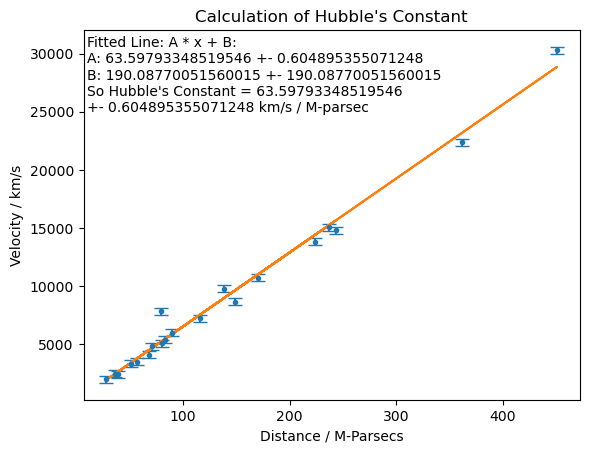

In [4]:
df=pd.read_csv('hubble.csv')
ex_4_1(df)

Here we can see that B is near 0, which show that out data is consistent witht the equation v=Hd, where H is Hubble's constant
Our calculated value of 63.60 km/s / M-parsec is below the generally accepted value of 68 km/s [1]

Now For Exercise 5_1 / Exercise 2, we define a function ex_5_2()

In [5]:
def ex_5_1(df):
    #Exponential Fitting
    # 5.1 exp fitting
    x = df['time/s'].values
    y = df['counts'].values

    
    
    A = 1200 #guesses of A
    B = 2
    C = 0.5

    parameters, covariant_matrix = curve_fit(exp, x, y, p0=(A, B, C))

    parameter_uncert = np.sqrt(covariant_matrix.diagonal())


    a_fit = parameters[0]
    a_err = parameter_uncert[0]
    b_fit = parameters[1]
    b_err = parameter_uncert[1]
    c_fit = parameters[2]
    c_err = parameter_uncert[2]
    plt.figure(1);
    plt.plot(x, y, '.', label = 'Raw Data')
    plt.plot(x, exp(x, a_fit, b_fit, c_fit), 'r', label = 'Fitted Line')



    plt.xlim(left = 0)
    plt.ylim(bottom = 400, top = 1300)
    plt.xlabel=df.columns[0]
    plt.ylabel = df.columns[1]
    plt.legend()
       
    print('y = ' + str(a_fit) + ' e ^(-' + str(b_fit) + 'x) + ' + str(c_fit))
    print('A: ' + str(a_fit) + ' +- ' + str(a_err))
    print('B: ' + str(b_fit) + ' +- ' + str(b_err))
    print('C: ' + str(c_fit) + ' +- ' + str(c_err))

    plt.annotate('Fitted Line: A * e^(-B * x) + C \nA: ' + str(a_fit) + ' +- ' + str(a_err) + '\n' + 'B: ' + str(b_fit) + ' +- ' + str(b_err) + '\n' + 'C: ' + str(c_fit) + ' +- ' + str(c_err), [0.5, 1100])
    plt.title('Exponential Decay of Protein Fluoresence data set')
    plt.savefig('ex5_1.png', dpi = 200)
    plt.show()
    return a_fit, b_fit, c_fit


And to execute this we run load the data and call the function

y = 926.4194761670524 e ^(-0.580763424295643x) + 264.0079968269351
A: 926.4194761670524 +- 47.621684842880875
B: 0.580763424295643 +- 0.07123378837499669
C: 264.0079968269351 +- 56.680884577584536


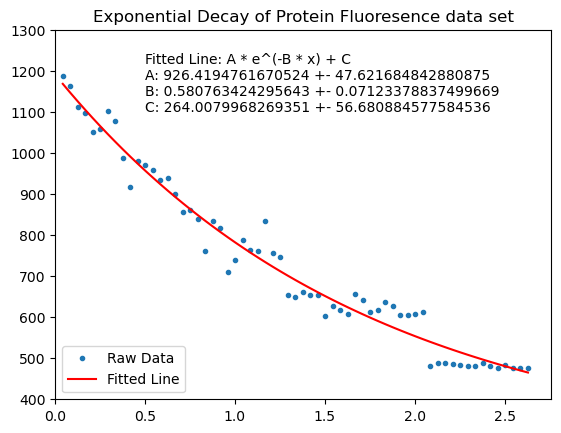

In [6]:
    df = pd.read_csv('protein_fluorescence.csv')
    a_fit, b_fit, c_fit = ex_5_1(df)

As can be seen from the plot, exponential decay is a suitable model for the start of the data, however there is some strange plateu at the end of the data set.
To estimate the time to drop to half the luminesence would be 
T * ln(2) = B,
so T = B / ln(2)

In [7]:
print(b_fit / np.log(2))

0.8378645121610171


And this value is consitent with our graph
Additionally, the fact that our C value is non-zero supports the hypothesis tghat there is a constant background signal, as in a truly exponential model C = 0;

In [8]:
def ex_5_2(df, a_fit, b_fit, c_fit):
    x = df['time/s'].values
    y = df['counts'].values
    df['counts corrected'] = df['counts'].values - c_fit
    df['counts log'] = np.log(df['counts corrected'])

    plt.figure(2)
    plt.plot(x, df['counts log'], '.', label = 'Raw Data')

    A = -0.5
    B = 7

    par_lin, cov_lin = curve_fit(lin, x, df['counts log'], p0 = (A, B))
    a2_fit = par_lin[0]
    b2_fit = par_lin[1]
    par_err = np.sqrt(cov_lin.diagonal())
    a2_err = par_err[0]
    b2_err = par_err[1]
    plt.plot(x, lin(x, a2_fit, b2_fit), label = 'Fitted Line')



    plt.xlim(left = 0)
    plt.ylim(bottom = 5, top = 7)
    plt.xlabel=df.columns[0]
    plt.ylabel = 'Logarithmic Corrected Counts'
    plt.legend()
    plt.title('Adjusted Logarithmic Plot for Corrected Fluoresence Counts')
    plt.annotate('Fitted Line: A * x + B:\nA: ' + str(a2_fit) + ' +- ' + str(a2_err) + '\n' + 'B: ' + str(b2_fit) + ' +- ' + str(b2_err), [0.5, 6.7])
    plt.savefig('ex5_2.png', dpi=200)
    plt.show()

Now for plotting the adjusted logarithmic model, accounting for the background light we use this function above. It uses the fitted values from ex_5_1 to adjust the data to account from background levels

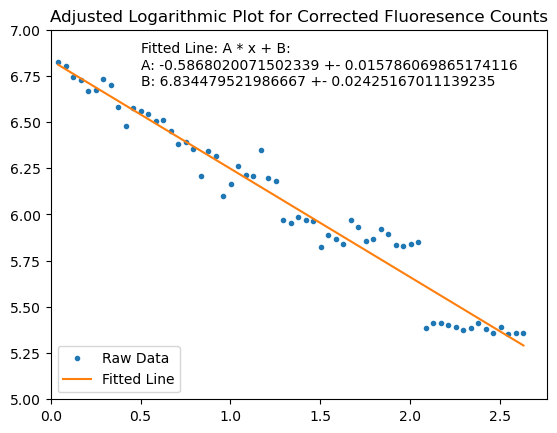

In [9]:
ex_5_2(df, a_fit, b_fit, c_fit)

Here we see that the slope of our linear model (A) is eqivalent to the decay constant of our exponential model, showing that they are consitent with each other
The graph shows a good linear fit, showing again that an exponetial model is suitable for this data

Finally we write a function to demonstrate polynomial fitting

In [10]:
def ex_6_1():
    x = [3, 6, 9, 12, 15, 18]
    y = [4.2, 22.1, 51.6, 91.8, 141.6, 200.6]
    df = pd.DataFrame({"time of flight (ms)":x, "displacement (pixels)":y})
    df["time of flight (s)"] = df["time of flight (ms)"]*0.001 #convert to ms to seconds
    x = df["time of flight (s)"].values
    par_poly, cov_poly = curve_fit(poly, x, y)
    par_poly_err = np.sqrt(cov_poly.diagonal())
    a3_fit = par_poly[0]
    b3_fit = par_poly[1]
    c3_fit = par_poly[2]
    a3_err = par_poly_err[0]
    b3_err = par_poly_err[1]
    c3_err = par_poly_err[2]

    plt.figure(3)
    plt.plot(x, y, '.', label = 'Raw Data')
    y_fit = [];
    for i in range(0, len(x)):
        y_fit.append(poly(x[i], a3_fit, b3_fit, c3_fit))
    plt.plot(x, y_fit, 'r', label = 'Fitted Polynomial')





    plt.xlim(left = 0)
    plt.ylim(bottom = 0, top = 225)
    plt.xlabel="time / s"
    plt.ylabel = "Distance / pixels"
    plt.legend()


    plt.title('Distance Travelled vs Time of Flight')
    plt.annotate('Fitted Line: A x^2 + B x + C \nA: ' + str(a3_fit) + ' +- ' + str(a3_err) + '\n' + 'B: ' + str(b3_fit) + ' +- ' + str(b3_err) + '\n' + 'C: ' + str(c3_fit) + ' +- ' + str(c3_err), [0.0002, 185])
    plt.savefig('ex_6_1.png', dpi = 200);
    plt.show()
    return a3_fit


And call it using the below code

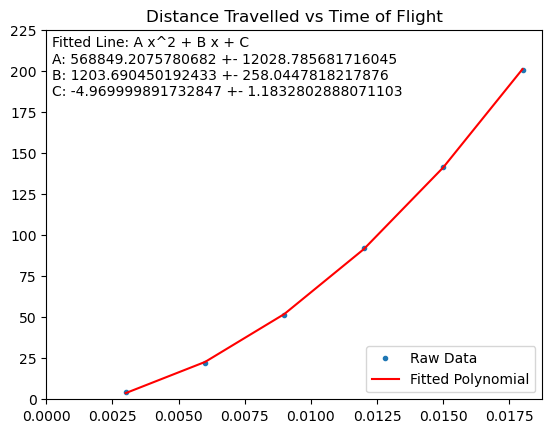

In [11]:
a3_fit = ex_6_1()

Here we can see that we do have a well fitting polynomial curve.
However it is offset along the X direction, showing that a t= 0 it was not at x = 0 or stationary, and this is shown by the non zero B and C terms in our equation

Now we can calculate D using our A coefficient as g/2D = A, so D = g/2A

In [12]:
print(9.81 / (2 * a3_fit))

8.622671763723681e-06


Which is our calculated value for D

References: 1. https://lambda.gsfc.nasa.gov/education/graphic_history/hubb_const.html
